In [216]:
import numpy as np
import pandas as pd
import scipy as sp
import os
import glob
import re

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
import umap

In [217]:
files = glob.glob('../data/txt/*.txt')

In [218]:
vec_tfidf = TfidfVectorizer(
    input='filename',
    sublinear_tf=True,
    use_idf=True,
    decode_error='replace',
    norm='l2',
    analyzer='word'
)

vec_count = CountVectorizer(
    input='filename',
    decode_error='replace',
    analyzer='word',
    max_features=100
)

In [219]:
vec = vec_tfidf
X = vec.fit_transform(files)

In [220]:
X

<33x66253 sparse matrix of type '<class 'numpy.float64'>'
	with 153168 stored elements in Compressed Sparse Row format>

In [221]:
df = pd.DataFrame(X.toarray())
df.columns = vec.get_feature_names_out()
df.head()

,10,130,1capite,326b29,327a30,426b,aa,aaa,aaron,ab,...,ὑπὸ,ὕδατι,ὕδωρ,ὠδῖνα,ὠδῖνος,ὡς,ὡστε,ῥιγαλέον,ῥυσμῷ,ῥἀυτὴ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017046,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
# opening the functionwords file

stops = []

with open('../data/functionwords.txt','r') as file:
    for line in file:
        words = line.lower().split()
        for word in words:
            stops.append(word)
            
stops = [s for s in stops if s != '/']
print(stops[:10])

['atqui', 'atqvi', 'autem', 'avtem', 'certe', 'ceu', 'cev', 'confestim', 'cum', 'cvm']


In [223]:
stops_df = df[df.columns.intersection(stops)]

In [224]:
names = [f.split('/')[-1].split('.')[0] for f in files]

In [225]:
names

['BurCom',
 'AristPha',
 'BurInt',
 'AnonMetaph',
 'BurEthN',
 'AristMet',
 'BarMirab',
 'WilMet',
 'JamPhys',
 'WilInPar',
 'BarMun',
 'WilTet',
 'AristPhaP',
 'WilInTim',
 'JamMetaph',
 'BurNemP',
 'WilCael',
 'BurGen',
 'WilHis',
 'AnonPhys',
 'WilElem',
 'WilSimp',
 'JamAnim',
 'WilGenA',
 'BarHom',
 'BurIon',
 'BarPue',
 'BurMat',
 'AristMen',
 'BurMatP',
 'WilAlex',
 'BurEthV',
 'BurFid']

In [226]:
translators = [re.match('[A-Z][a-z]+', fn)[0] for fn in names]
translators

['Bur',
 'Arist',
 'Bur',
 'Anon',
 'Bur',
 'Arist',
 'Bar',
 'Wil',
 'Jam',
 'Wil',
 'Bar',
 'Wil',
 'Arist',
 'Wil',
 'Jam',
 'Bur',
 'Wil',
 'Bur',
 'Wil',
 'Anon',
 'Wil',
 'Wil',
 'Jam',
 'Wil',
 'Bar',
 'Bur',
 'Bar',
 'Bur',
 'Arist',
 'Bur',
 'Wil',
 'Bur',
 'Bur']

In [227]:
stops_df.insert(0,'name',names)
stops_df

,name,atqui,autem,avtem,certe,ceu,confestim,cum,cvm,dehinc,...,uidelicet,ut,utique,velut,veluti,velvt,vero,videlicet,vt,vtiqve
0,BurCom,0.000000,0.026785,0.000000,0.013297,0.007250,0.013762,0.019225,0.000000,0.008789,...,0.000000,0.021808,0.024825,0.025435,0.000000,0.000000,0.023373,0.006953,0.000000,0.000000
1,AristPha,0.034563,0.020137,0.000000,0.024645,0.023551,0.005673,0.018388,0.000000,0.018143,...,0.000000,0.018114,0.022101,0.025860,0.020630,0.000000,0.025049,0.011580,0.000000,0.000000
2,BurInt,0.000000,0.015325,0.000000,0.003074,0.011165,0.015751,0.013378,0.000000,0.004848,...,0.000000,0.013094,0.013535,0.011991,0.004848,0.000000,0.019045,0.014703,0.000000,0.000000
3,AnonMetaph,0.020547,0.022553,0.000000,0.007976,0.006129,0.000000,0.015739,0.000000,0.000000,...,0.000000,0.022212,0.000000,0.016678,0.025247,0.000000,0.029853,0.000000,0.000000,0.000000
4,BurEthN,0.000000,0.050065,0.000000,0.012378,0.000000,0.000000,0.022290,0.000000,0.000000,...,0.000000,0.028545,0.046029,0.000000,0.000000,0.000000,0.040472,0.000000,0.000000,0.000000
5,AristMet,0.033608,0.029861,0.000000,0.028224,0.047024,0.000000,0.024468,0.000000,0.015112,...,0.000000,0.028766,0.028071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,BarMirab,0.000000,0.035779,0.000000,0.008371,0.000000,0.024185,0.018973,0.000000,0.000000,...,0.000000,0.022687,0.015475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,WilMet,0.000000,0.027383,0.000000,0.005290,0.000000,0.005475,0.018847,0.000000,0.000000,...,0.000000,0.019685,0.020613,0.009602,0.000000,0.000000,0.000000,0.000000,0.014972,0.000000
8,JamPhys,0.000000,0.030812,0.000000,0.000000,0.000000,0.000000,0.023244,0.000000,0.000000,...,0.000000,0.023534,0.024542,0.000000,0.000000,0.000000,0.029805,0.007199,0.000000,0.000000
9,WilInPar,0.000000,0.014115,0.027972,0.000000,0.000000,0.004245,0.009872,0.014953,0.003821,...,0.018089,0.011964,0.013304,0.004397,0.003821,0.005076,0.007179,0.000000,0.021639,0.033128


In [228]:
stops_df.to_csv('../data/stops_df.csv')

In [229]:
# Dimension reduction and clustering with UMAP

umap_results = pd.DataFrame(stops_df['name'])
umapper = umap.UMAP(
    n_neighbors=15,
    n_components=2,
    metric='cosine',
    # UMAP figures change with every run if not seeded
    random_state=42
)

u = umapper.fit_transform(stops_df.drop(['name'], axis=1))
umap_results['X'], umap_results['Y'] =  u[:,0], u[:,1]
umap_results['translator'] = translators # used for colouring

In [230]:
umap_results

,name,X,Y,translator
0,BurCom,15.476037,-4.838672,Bur
1,AristPha,13.856210,-5.129179,Arist
2,BurInt,15.048484,-4.724835,Bur
3,AnonMetaph,13.877363,-6.248649,Anon
4,BurEthN,13.183407,-8.545083,Bur
5,AristMet,14.295098,-5.360302,Arist
6,BarMirab,14.860149,-8.243638,Bar
7,WilMet,15.335224,-6.699314,Wil
8,JamPhys,13.692086,-7.044219,Jam
9,WilInPar,16.124666,-6.807909,Wil


In [231]:
!pip install rpy2

In [232]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


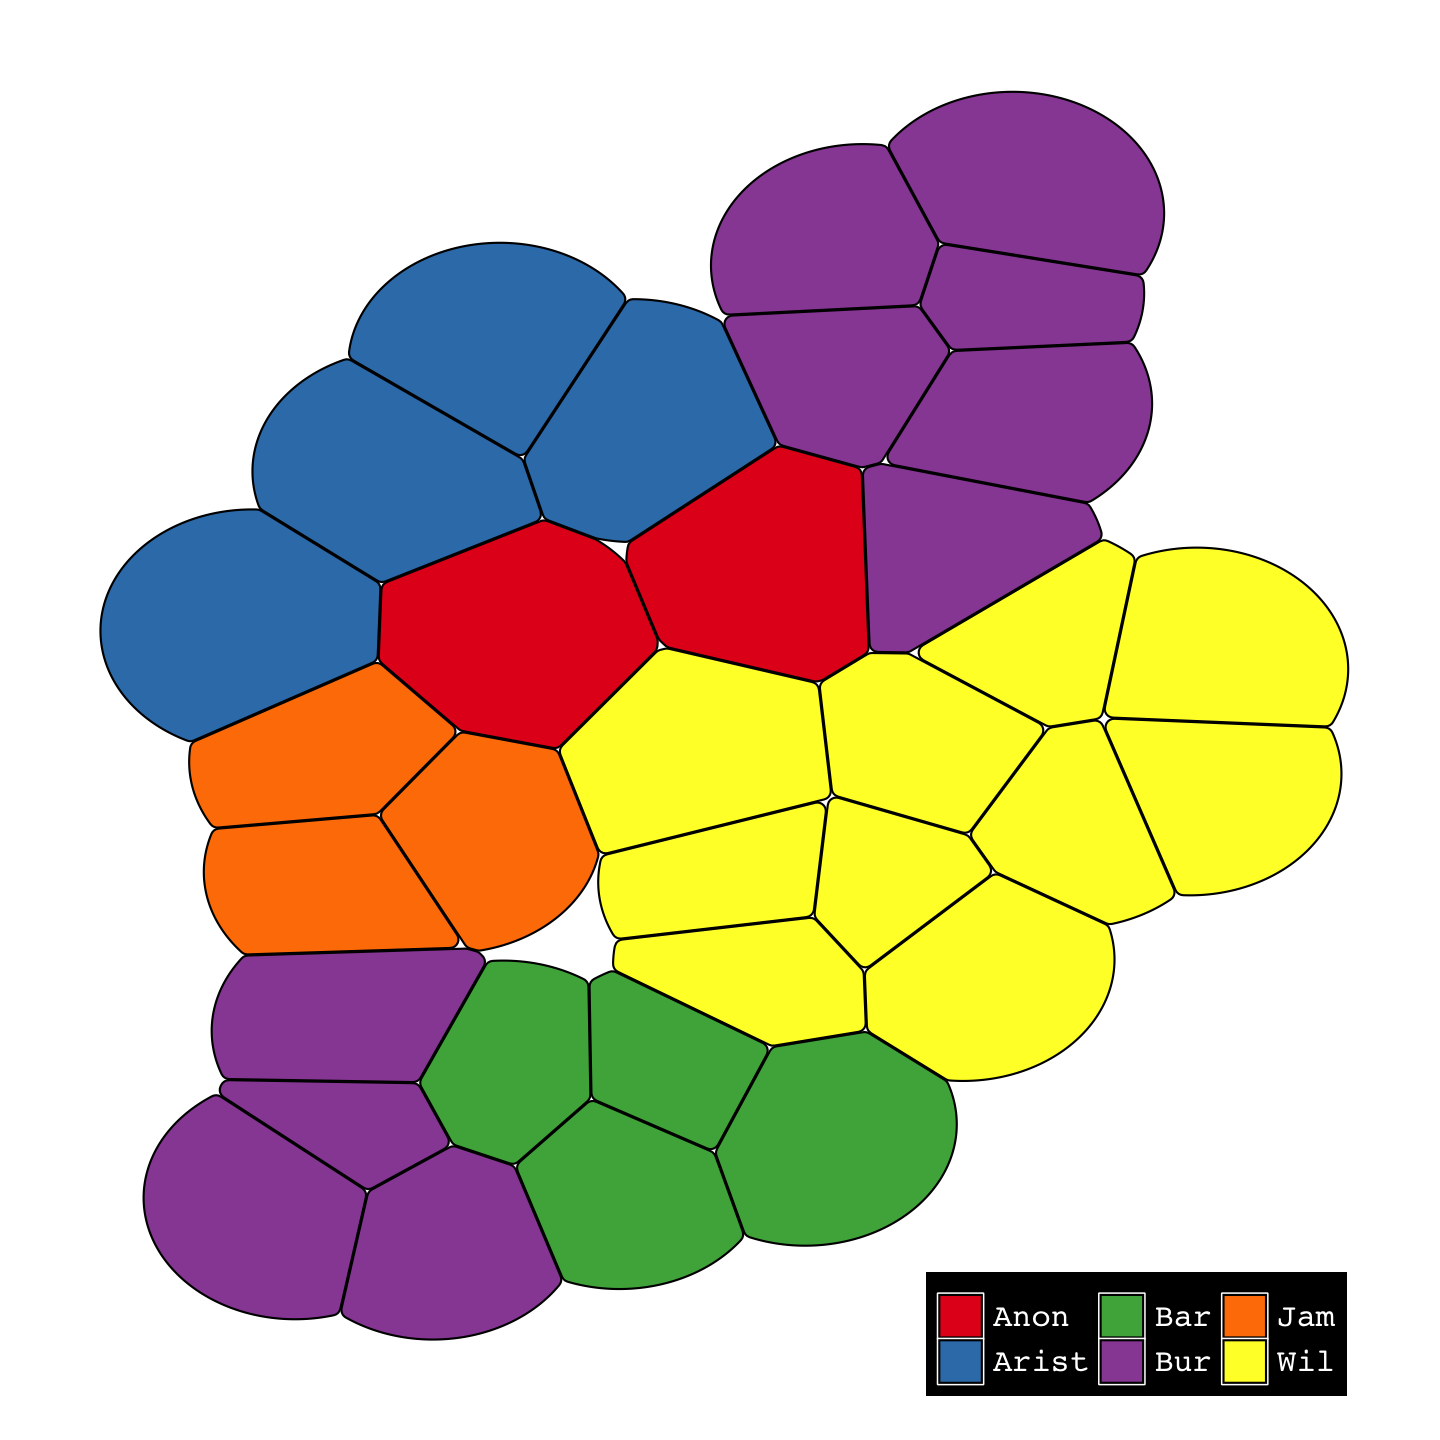

In [264]:
%%R -i umap_results -h 10 -w 10 -u in -r 144

library(ggforce)
library(ggsci)
library(extrafont)
source('theme_black.R')
pal <- c("#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#FFFF33", "#A65628")

ggplot(data=umap_results,aes(x=X, y=Y)) +
geom_voronoi_tile(aes(fill = translator, group = -1L, ), max.radius = 0.5,
                    colour = 'black', expand = unit(-0.1, 'mm'), 
                    radius = unit(1.5, 'mm')) +
scale_fill_manual(values=pal) +


theme_black() +
theme(
    plot.title = element_text(margin = margin(b = 50)),
    panel.border = element_blank()
) +
guides(fill = guide_legend(ncol=3, override.aes = aes(size=8))) +
theme(legend.title=element_blank(), legend.position= c(0.8, 0.05), legend.text=element_text(size=16)) +
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
theme(text = element_text(size=10, family="Courier"), panel.grid.minor=element_blank(), panel.grid.major=element_blank())

In [234]:
dfs = []
X,y = stops_df.drop('name',axis=1), stops_df['name']
# make 100 KNN graphs using a random subset of 25 features
for _ in range(100):
    this_X = X.sample(25,axis=1)
    #cl = KNeighborsClassifier(n_neighbors=3, metric='mahalanobis',metric_params={'V': np.cov(this_X.T)})
    cl = KNeighborsClassifier(n_neighbors=3, metric='cosine')
    cl.fit(this_X,y)
    dists,indices = cl.kneighbors(n_neighbors=3)
    dicts = []
    for i, node_ary in enumerate(indices):
        for j, node in enumerate(node_ary):
            dicts.append({
                'from': y[i],
                'to': y[node],
                # neighbors are sorted low distance to high
                # so this gives us the 'inverse rank' ie lowest
                # distance of n neighbors scores n, next is n-1 etc
                # this is consistent with the stylo BCT algorithm
                'weight': (len(node_ary)-j)
            })
    dfs.append(pd.DataFrame(dicts))

# now merge all the graphs by adding the edge weights
consensus = pd.concat(dfs).groupby(['from','to'],as_index=False).agg(sum)

In [235]:
consensus

,from,to,weight
0,AnonMetaph,AnonPhys,71
1,AnonMetaph,AristMen,88
2,AnonMetaph,AristMet,12
3,AnonMetaph,AristPha,59
4,AnonMetaph,BarHom,2
...,...,...,...
643,WilTet,WilHis,16
644,WilTet,WilInPar,12
645,WilTet,WilInTim,124
646,WilTet,WilMet,246


In [248]:
# trim to taste, otherwise it's very noisy
consensus = consensus[consensus['weight'] >= 20]

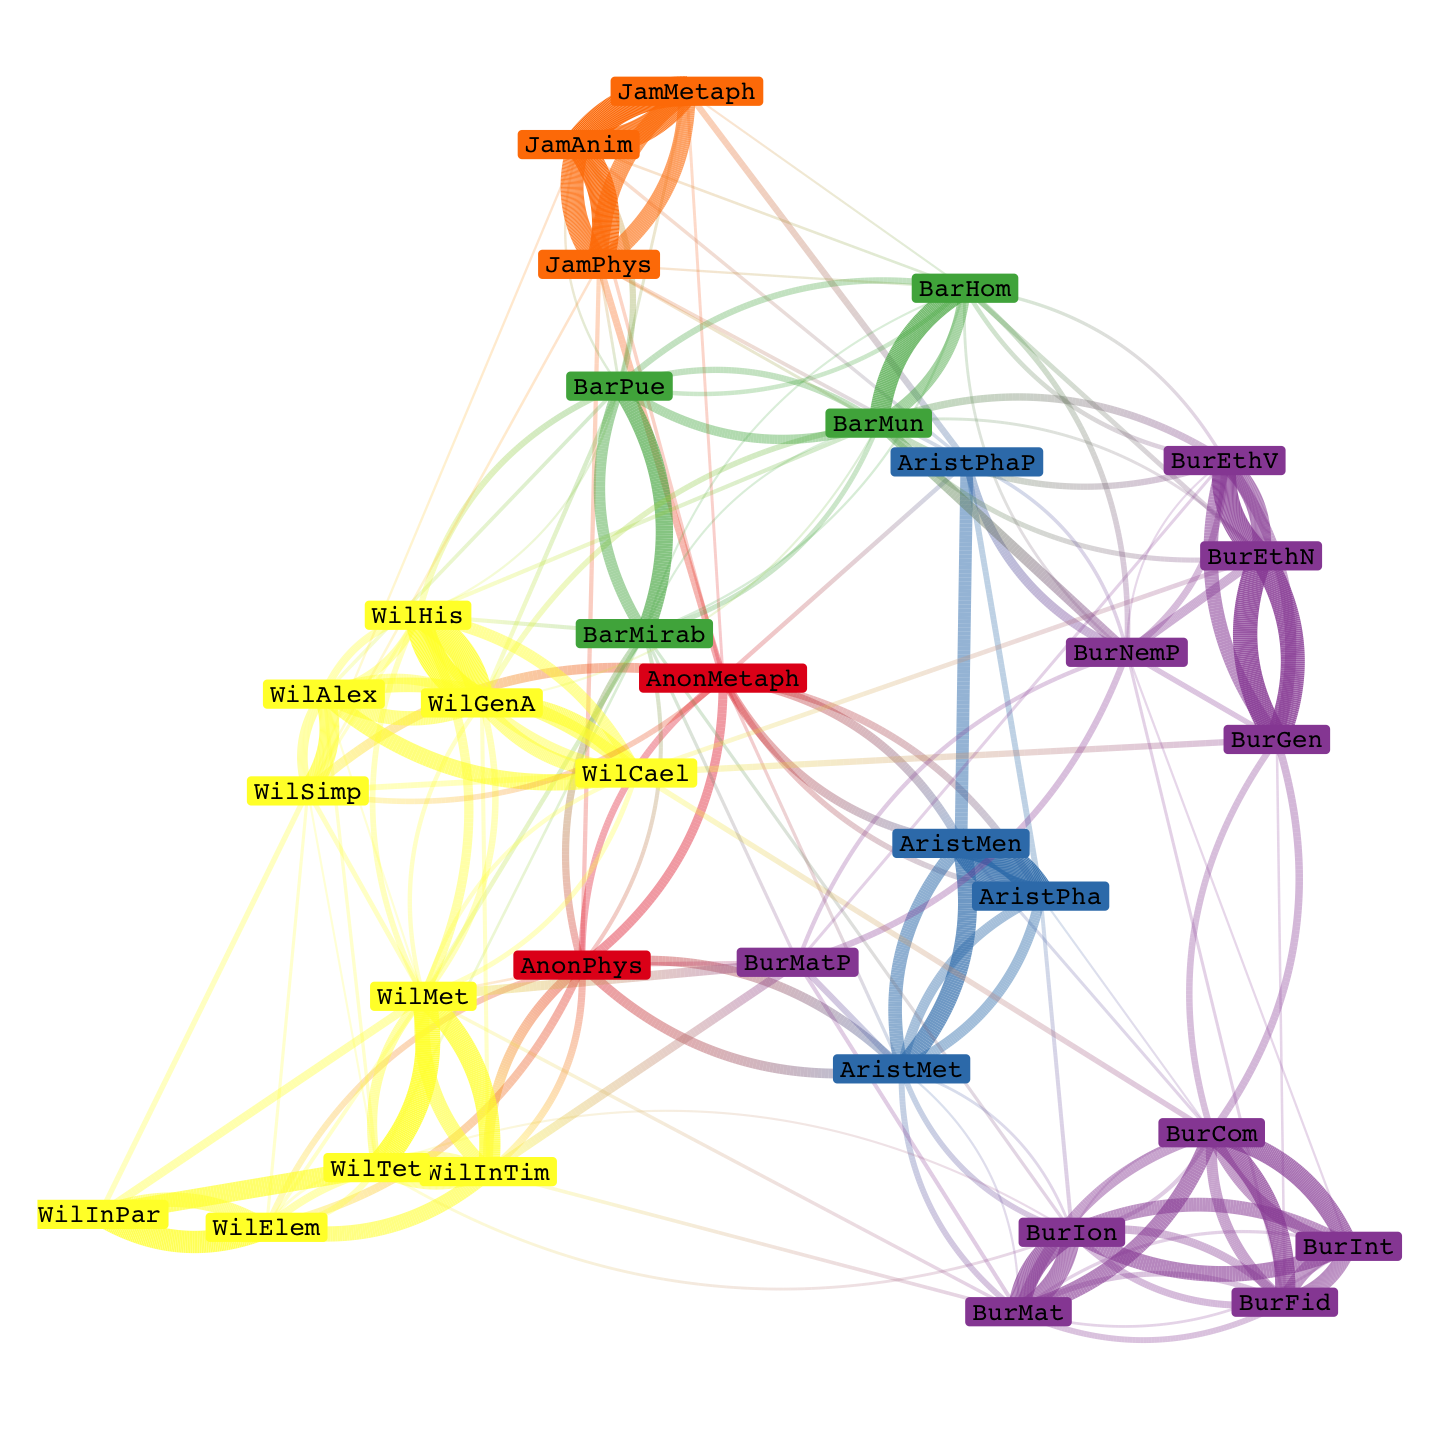

In [265]:
%%R -i consensus  -h 10 -w 10 -u in -r 144

library(tidygraph)
library(ggraph)
library(stringr)
source('theme_black.R')
pal <- c("#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#FFFF33", "#A65628")

set.seed(42)
gr1 <- as_tbl_graph(consensus)
# Plot
gr1 %>%
    activate(nodes) %>%
    mutate(transl = str_match(name, '[A-Z][a-z]+')) %>%
    ggraph(layout = 'fr') + 
    geom_edge_fan2(aes(width=weight,color=node.transl,alpha=weight),strength=2,show.legend=FALSE) + 
    geom_node_label(
        label.size=NA,
        size = 4.5,
        family="Courier",
        aes(fill=transl, label=name),
    ) +
    scale_fill_manual(values=pal) +
    scale_color_manual(values=pal) +
    scale_edge_color_manual(values=pal) +
    scale_edge_width(range=c(0.5,7)) +
    scale_edge_alpha(range=c(0.2,1)) +
    theme_black() +
    theme(
        plot.title = element_text(margin = margin(b = 50)),
        panel.border = element_blank()
    ) +
    theme(legend.position='none') +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    theme(axis.title.y=element_blank(),
            axis.text.y=element_blank(),
            axis.ticks.y=element_blank()) +
    theme(text = element_text(family="Courier"),panel.grid.minor=element_blank(), panel.grid.major=element_blank())

### Using Networkx for python

In [186]:
import networkx as nx
G = nx.from_pandas_edgelist(consensus, source='from', target='to', edge_attr=True)

In [49]:
pos = nx.drawing.layout.spring_layout(G)
nx.set_node_attributes(G, pos, 'pos')

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

In [50]:
G.nodes._nodes

{'AnonMetaph': {'pos': array([-0.11151903, -0.32744594])},
 'AnonPhys': {'pos': array([-0.0064219 , -0.65726918])},
 'AristMen': {'pos': array([-0.46437275, -0.3401848 ])},
 'AristPha': {'pos': array([-0.53906112, -0.45253862])},
 'BurEthV': {'pos': array([-0.1884269 ,  0.66578531])},
 'JamAnim': {'pos': array([0.22832178, 0.27573785])},
 'JamPhys': {'pos': array([0.13190518, 0.04370185])},
 'WilSimp': {'pos': array([ 0.51778736, -0.39034888])},
 'AristMet': {'pos': array([-0.44477078, -0.62969308])},
 'WilElem': {'pos': array([ 0.42940983, -0.94519044])},
 'WilInTim': {'pos': array([ 0.16326436, -0.29422255])},
 'WilMet': {'pos': array([ 0.39121593, -0.26605917])},
 'JamMetaph': {'pos': array([0.06103516, 0.35625483])},
 'BurIon': {'pos': array([-0.88970151, -0.21533968])},
 'BurMat': {'pos': array([-0.67581733, -0.09037507])},
 'BurCom': {'pos': array([-0.73296574,  0.21580473])},
 'AristPhaP': {'pos': array([-0.34209816,  0.13832442])},
 'BarHom': {'pos': array([0.13782273, 0.759251